# **Community Improvement: Analyzing Socioeconomic Factors, Crime Patterns, and School Safety in Chicago.**

## **Introduction to the Data:**
### This project involves analyzing three key datasets related to the city of Chicago:

#### **Chicago Census Data:** This dataset provides demographic information such as income levels, education, and other socio-economic factors for different regions within Chicago. It serves as a foundation for understanding the socio-economic environment of the city.

#### **Chicago Crime Data:** This dataset contains detailed information about crimes reported in Chicago, including the type of crime, the location, and the date of occurrence etc. This data is crucial for analyzing crime patterns, identifying crime hotspots, and understanding the relationship between crime and various socio-economic factors.

#### **Chicago Public Schools Data:** This dataset includes information about public schools in Chicago, such as school ratings, graduation rates, student demographics, and overall performance.

# **`Objectives:`**
## `1. To identify the key factors contributing to a higher hardship index and suggest steps to mitigate it.`
## `2. To determine the most crime-prone locations and identify the types of crimes most likely to occur.`
## `3. To assess the safety levels of different types of schools.`

- #### `ipython-sql` library connects the Jupyter Notebook to the SQL database and enables us to use magic SQL commands (%sql and %%sql) to query SQL statements directly from the notebook.

In [2]:
# Installing ipython-sql.
!pip install ipython-sql

- #### The command `%load_ext sql` is used to load the ipython-sql extension in our Jupyter Notebook, enabling the use of SQL magic commands (%sql and %%sql).

In [4]:
# Loading the extension in our notebook.
%load_ext sql

- #### The command `%sql sqlite:///ibm_sql.db` is used to connect to an `sqlite database`, in this case its `ibm_sql.db` . If it already exists, then it will connect to it, and if it doesn't exist, then it will create an sqlite database with the specified name and then connect to it.

In [6]:
# Connecting to the sqlite database with the name 'ibm_sql.db'
%sql sqlite:///ibm_sql.db

- #### The `prettytable` library in Python is used to make tabular data look neat, organized, and visually appealing in a simple ASCII format.

In [7]:
# Installing prettytable library.
!pip install prettytable

In [8]:
import prettytable 
prettytable.DEFAULT = 'DEFAULT'

#### We will now be importing all the necessary libraries for this project.

In [10]:
# importing all the necessary libraries for this project.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

- #### `sqlite3` is an easy-to-use, lightweight and serverless database library in Python that allows us to create and connect to SQLite databases.

In [12]:
# Importing sqlite3.
import sqlite3

In [14]:
# Creating a connection using sqlite3 with 'ibm_sql' database that I've created previously.
con = sqlite3.connect('ibm_sql.db')

In [16]:
# Loading the data(which is in csv format) using pandas.
chicago_census_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')

In [18]:
# Loading the pandas dataframe to sql database as a table with the name 'chicago_census_data'.
chicago_census_data.to_sql('chicago_census_data', con, if_exists='replace', index=False, method='multi')

78

In [20]:
chicago_public_schools = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')
chicago_public_schools.to_sql('chicago_public_schools', con, if_exists='replace', index=False, method='multi')

566

In [246]:
chicago_crime_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')
chicago_crime_data.to_sql('chicago_crime_data', con, if_exists='replace', index=False, method='multi')

533

## We now have all our data in place. So lets start playing with it...

## First let's solve some problems using magic sql statements and then we'll do some beautiuful visualizations.

# `Problem 1`
#### Find the total number of crimes recorded in the CRIME table.

In [628]:
%%sql
SELECT COUNT(ID) FROM chicago_crime_data;

 * sqlite:///ibm_sql.db
Done.


COUNT(ID)
533


# `Problem 2`
#### List community area names and numbers with per capita income less than 11000.

In [22]:
%%sql
SELECT * 
FROM chicago_census_data
LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0


In [609]:
%%sql 
SELECT COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME, PER_CAPITA_INCOME
FROM chicago_census_data
WHERE PER_CAPITA_INCOME < 11000
ORDER BY PER_CAPITA_INCOME;

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
54.0,Riverdale,8201
30.0,South Lawndale,10402
37.0,Fuller Park,10432
26.0,West Garfield Park,10934


# `Problem 3`
#### List all case numbers for crimes involving minors?(children are not considered minors for the purposes of crime analysis) 

In [114]:
%%sql
SELECT * 
FROM chicago_crime_data
LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.8074405,-87.70395585,"(41.8074405, -87.703955849)"


In [632]:
%%sql
SELECT DISTINCT PRIMARY_TYPE, DESCRIPTION
FROM chicago_crime_data;

 * sqlite:///ibm_sql.db
Done.


PRIMARY_TYPE,DESCRIPTION
THEFT,FROM BUILDING
THEFT,$500 AND UNDER
THEFT,FINANCIAL ID THEFT: OVER $300
THEFT,OVER $500
THEFT,RETAIL THEFT
THEFT,AGG: FINANCIAL ID THEFT
THEFT,PURSE-SNATCHING
THEFT,POCKET-PICKING
THEFT,ATTEMPT THEFT
BATTERY,SIMPLE


In [124]:
%%sql
SELECT CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION 
FROM chicago_crime_data
WHERE DESCRIPTION LIKE '%minor%';

 * sqlite:///ibm_sql.db
Done.


CASE_NUMBER,PRIMARY_TYPE,DESCRIPTION
HL266884,LIQUOR LAW VIOLATION,SELL/GIVE/DEL LIQUOR TO MINOR
HK238408,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR


# `Problem 4`
#### List all kidnapping crimes involving a child?

In [129]:
%%sql
SELECT *
FROM chicago_crime_data
WHERE PRIMARY_TYPE LIKE '%kidnapping%' AND DESCRIPTION LIKE '%child%';

 * sqlite:///ibm_sql.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
5276766,HN144152,2007-01-26,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,1533,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.87490841,-87.75024931,"(41.874908413, -87.750249307)"


# `Problem 5`
#### List the kind of crimes that were recorded at schools. (No repetitions)

In [613]:
%%sql
SELECT DISTINCT PRIMARY_TYPE AS TYPE_OF_CRIME
FROM chicago_crime_data
WHERE LOCATION_DESCRIPTION LIKE '%school%';

 * sqlite:///ibm_sql.db
Done.


TYPE_OF_CRIME
BATTERY
CRIMINAL DAMAGE
NARCOTICS
ASSAULT
CRIMINAL TRESPASS
PUBLIC PEACE VIOLATION


# `Problem 6`
#### List the type of schools along with the average safety score for each type.

In [155]:
chicago_public_schools.columns

Index(['School_ID', 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School',
       'Street_Address', 'City', 'State', 'ZIP_Code', 'Phone_Number', 'Link',
       'Network_Manager', 'Collaborative_Name',
       'Adequate_Yearly_Progress_Made_', 'Track_Schedule',
       'CPS_Performance_Policy_Status', 'CPS_Performance_Policy_Level',
       'HEALTHY_SCHOOL_CERTIFIED', 'Safety_Icon', 'SAFETY_SCORE',
       'Family_Involvement_Icon', 'Family_Involvement_Score',
       'Environment_Icon', 'Environment_Score', 'Instruction_Icon',
       'Instruction_Score', 'Leaders_Icon', 'Leaders_Score', 'Teachers_Icon',
       'Teachers_Score', 'Parent_Engagement_Icon', 'Parent_Engagement_Score',
       'Parent_Environment_Icon', 'Parent_Environment_Score',
       'AVERAGE_STUDENT_ATTENDANCE', 'Rate_of_Misconducts__per_100_students_',
       'Average_Teacher_Attendance',
       'Individualized_Education_Program_Compliance_Rate', 'Pk_2_Literacy__',
       'Pk_2_Math__', 'Gr3_5_Grade_Level_Math__', 'Gr3_5_Gr

In [634]:
%%sql
SELECT *
FROM chicago_public_schools
LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,HEALTHY_SCHOOL_CERTIFIED,Safety_Icon,SAFETY_SCORE,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,AVERAGE_STUDENT_ATTENDANCE,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,COLLEGE_ENROLLMENT,General_Services_Route,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Weak,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"


In [187]:
%%sql
SELECT "Elementary, Middle, or High School" AS TYPE_OF_SCHOOL, AVG(SAFETY_SCORE) AS AVERAGE_SAFETY_SCORE
FROM chicago_public_schools
GROUP BY "Elementary, Middle, or High School";

 * sqlite:///ibm_sql.db
Done.


TYPE_OF_SCHOOL,AVERAGE_SAFETY_SCORE
ES,49.52038369304557
HS,49.62352941176471
MS,48.0


# `Problem 7`
#### List 5 community areas with highest % of households below poverty line

In [192]:
%%sql
SELECT * 
FROM chicago_census_data
LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0


In [196]:
%%sql
SELECT COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY, PER_CAPITA_INCOME
FROM chicago_census_data
ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC
LIMIT 5;

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PER_CAPITA_INCOME
54.0,Riverdale,56.5,8201
37.0,Fuller Park,51.2,10432
68.0,Englewood,46.6,11888
29.0,North Lawndale,43.1,12034
27.0,East Garfield Park,42.4,12961


# `Problem 8`
#### Which community area is most crime prone? Display the coumminty area number only.

In [199]:
%%sql
SELECT * 
FROM chicago_crime_data
LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.8074405,-87.70395585,"(41.8074405, -87.703955849)"


In [203]:
%%sql
SELECT COMMUNITY_AREA_NUMBER
FROM chicago_crime_data
GROUP BY COMMUNITY_AREA_NUMBER
ORDER BY COUNT(COMMUNITY_AREA_NUMBER) DESC
LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NUMBER
25.0


# `Problem 9`
#### Use a sub-query to find the name of the community area with highest hardship index

In [206]:
chicago_census_data.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

In [218]:
%%sql
SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX
FROM chicago_census_data
WHERE COMMUNITY_AREA_NUMBER IN (SELECT COMMUNITY_AREA_NUMBER FROM chicago_census_data ORDER BY HARDSHIP_INDEX DESC LIMIT 1);

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NAME,HARDSHIP_INDEX
Riverdale,98.0


The following is another way of doing it i.e. without using sub query,

In [232]:
%%sql
SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX
FROM chicago_census_data
ORDER BY HARDSHIP_INDEX DESC
LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NAME,HARDSHIP_INDEX
Riverdale,98.0


# `Problem 10`
#### Use a sub-query to determine the Community Area Name with most number of crimes?

In [239]:
%sql SELECT * FROM chicago_census_data LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0


In [241]:
%sql SELECT * FROM chicago_crime_data LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.8074405,-87.70395585,"(41.8074405, -87.703955849)"


In [245]:
%%sql
SELECT COMMUNITY_AREA_NAME
FROM chicago_census_data
WHERE COMMUNITY_AREA_NUMBER IN (SELECT COMMUNITY_AREA_NUMBER FROM chicago_crime_data GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(COMMUNITY_AREA_NUMBER) DESC LIMIT 1);

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NAME
Austin


# **Visualizations**

# `1. Our objective is to Identify the most common crime types.`
####  For this we will use barplot from seaborn to know how many times each kind of crime has happened.

In [636]:
%sql SELECT * FROM chicago_crime_data LIMIT 1;

 * sqlite:///ibm_sql.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,0,0,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.8074405,-87.70395585,"(41.8074405, -87.703955849)"


In [642]:
%%sql crime_type <<
SELECT DISTINCT PRIMARY_TYPE AS CRIME_TYPE, COUNT(PRIMARY_TYPE) AS NUMBER_OF_TIMES
FROM chicago_crime_data
GROUP BY PRIMARY_TYPE;

 * sqlite:///ibm_sql.db
Done.
Returning data to local variable crime_type


In [644]:
crime_type_df = crime_type.DataFrame()

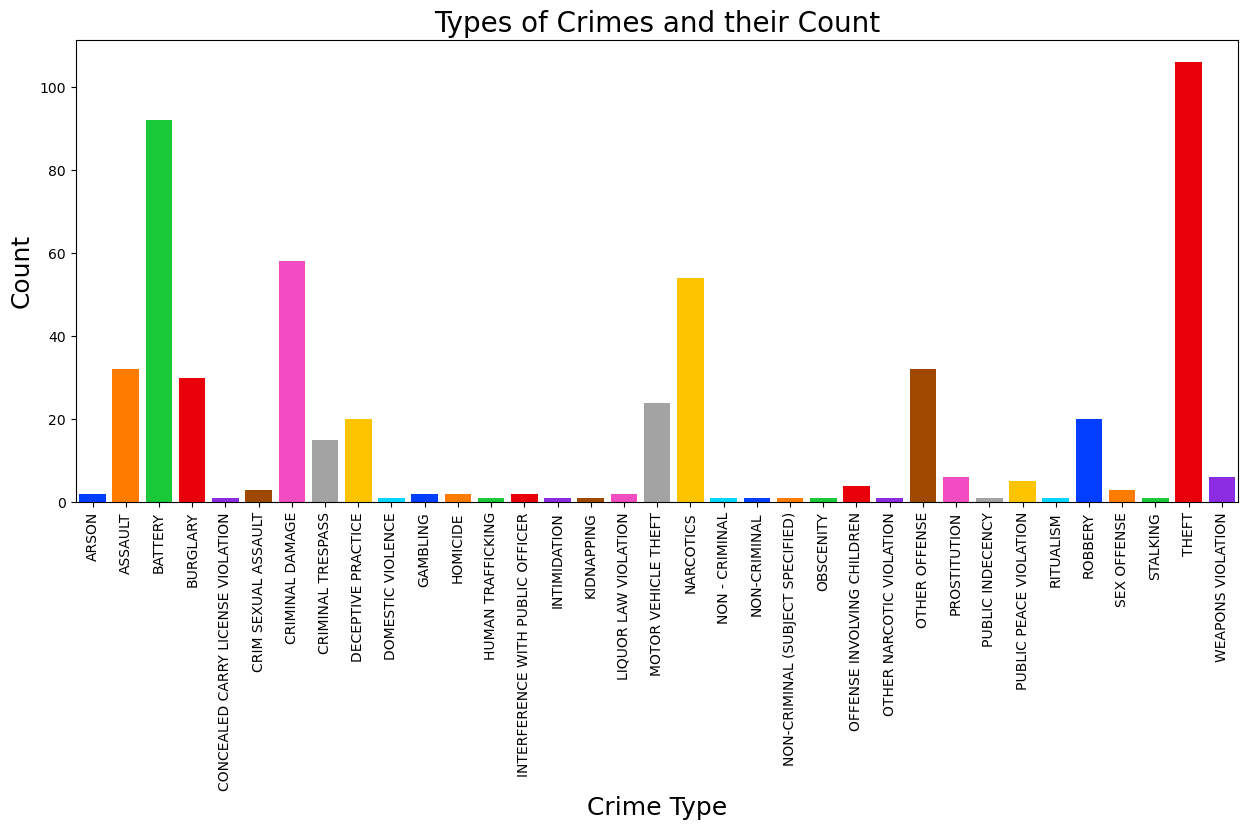

In [646]:
plt.figure(figsize=(15,6))
sb.barplot(x='CRIME_TYPE', y='NUMBER_OF_TIMES', data=crime_type_df, hue='CRIME_TYPE', palette='bright', saturation=1)
plt.xticks(rotation=90, ha='center')
plt.title('Types of Crimes and their Count', size=20)
plt.xlabel('Crime Type', size=18)
plt.ylabel('Count', size=18)
plt.show()

## **Findings:**
#### We've found that, of all crime types, **`theft`** happened the most number of times followed by **`battery`** and **`criminal damage`** and so on.

### In the above plot, we visualized the frequency of each crime type, which gave us a clear understanding of the most and least common crimes. Now, we want to focus specifically on the top 10 most frequent crime types, excluding the less common ones.

## `2. Now our Objective is to explicitly find out only the top 10 most common crime types.`

In [152]:
# Renaming the column name in the 'crime_type_df' dataframe.
crime_type_df.rename(columns={'NUMBER_OF_TIMES':'COUNT'}, inplace=True)

In [160]:
# Sorting 'crime_type_df' dataframe based on 'count' column in descending order.
ordered_crime_df = crime_type_df.sort_values(by='COUNT', ascending=False)

In [166]:
# Reseting the index of the sorted dataframe.
ordered_crime_df.reset_index(inplace=True)

In [176]:
# Deleting the separate index column from the dataframe.
ordered_crime_df.drop(columns=['index'], inplace=True)

In [186]:
# Creating a new dataframe which contains the first 10 entries from the sorted dataframe i.e. top 10 crime types.
top_10_crimes = ordered_crime_df.head(10)

In [188]:
top_10_crimes

,CRIME_TYPE,COUNT
0,THEFT,106
1,BATTERY,92
2,CRIMINAL DAMAGE,58
3,NARCOTICS,54
4,ASSAULT,32
5,OTHER OFFENSE,32
6,BURGLARY,30
7,MOTOR VEHICLE THEFT,24
8,ROBBERY,20
9,DECEPTIVE PRACTICE,20


C:\Users\HI\AppData\Local\Temp\ipykernel_6404\2394080849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='CRIME_TYPE', y='COUNT', data = top_10_crimes, palette='Purples_r')


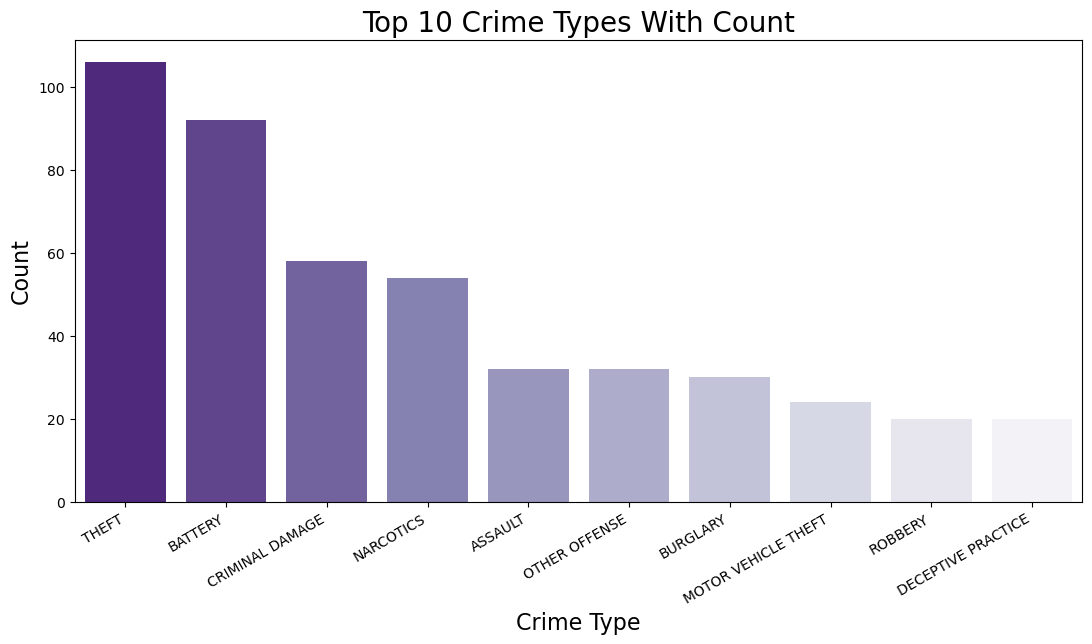

In [689]:
plt.figure(figsize=(13,6))
sb.barplot(x='CRIME_TYPE', y='COUNT', data = top_10_crimes, palette='Purples_r')  
plt.xticks(rotation=30, ha='right')
plt.title('Top 10 Crime Types With Count', size=20)
plt.xlabel('Crime Type', size=16)
plt.ylabel('Count', size=16)
plt.show()

## **Findings:**
#### The plot highlights the top 10 most common crime types, which are `Theft`, `Battery`, `Criminal Damage`, `Narcotics`, `Assault`, `Other Offense`, `Burglary`, `Motor Vehicle Theft`, `Robbery`, and `Deceptive Practice`. These findings provide valuable insights into the dominant crime patterns in the dataset, with `theft leading the list`, followed by violent crimes like battery and assault.

### Next, we want to identify the locations where crimes occured and analyze the different types of crimes that happened at each location.

## `3. Our Objective now is to determine the locations where crimes are most frequently committed and analyze the types of crimes that occur at each location.`

In [275]:
chicago_crime_data.columns

Index(['ID', 'CASE_NUMBER', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY_TYPE',
       'DESCRIPTION', 'LOCATION_DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT',
       'DISTRICT', 'WARD', 'COMMUNITY_AREA_NUMBER', 'FBICODE', 'X_COORDINATE',
       'Y_COORDINATE', 'YEAR', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [391]:
%%sql crime_locations <<
SELECT DISTINCT LOCATION_DESCRIPTION AS LOCATION, COUNT(LOCATION_DESCRIPTION) AS COUNT, PRIMARY_TYPE 
FROM chicago_crime_data
GROUP BY LOCATION_DESCRIPTION
ORDER BY COUNT DESC;

 * sqlite:///ibm_sql.db
Done.
Returning data to local variable crime_locations


In [711]:
type(crime_locations)

sql.run.ResultSet

In [393]:
crime_locations

LOCATION,COUNT,PRIMARY_TYPE
STREET,136,THEFT
RESIDENCE,84,THEFT
SIDEWALK,64,THEFT
APARTMENT,59,THEFT
OTHER,18,THEFT
PARKING LOT/GARAGE(NON.RESID.),16,THEFT
RESTAURANT,11,THEFT
ALLEY,11,THEFT
RESIDENCE-GARAGE,10,THEFT
RESIDENCE PORCH/HALLWAY,10,THEFT


In [395]:
# Converting the 'sql.run.ResultSet' into a pandas dataframe.
crime_locations_df = crime_locations.DataFrame()

In [713]:
crime_locations_df.shape

(48, 3)

In [715]:
# We only want the top 20 locations.
top_crime_location_df = crime_locations_df.head(20)

In [717]:
top_crime_location_df

,LOCATION,COUNT,PRIMARY_TYPE
0,STREET,136,THEFT
1,RESIDENCE,84,THEFT
2,SIDEWALK,64,THEFT
3,APARTMENT,59,THEFT
4,OTHER,18,THEFT
5,PARKING LOT/GARAGE(NON.RESID.),16,THEFT
6,RESTAURANT,11,THEFT
7,ALLEY,11,THEFT
8,RESIDENCE-GARAGE,10,THEFT
9,RESIDENCE PORCH/HALLWAY,10,THEFT


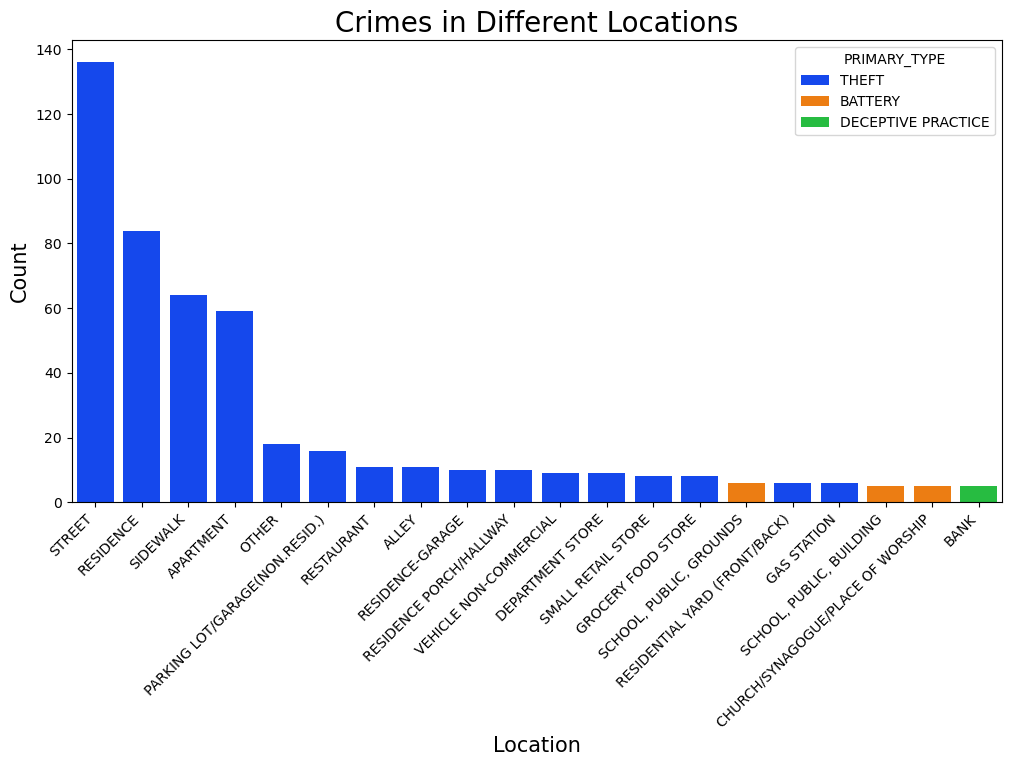

In [719]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45, ha='right')
sb.barplot(x='LOCATION', y='COUNT', data=top_crime_location_df, hue='PRIMARY_TYPE', palette='bright', saturation=0.85)
plt.title('Crimes in Different Locations', size=20)
plt.xlabel('Location', size=15)
plt.ylabel('Count', size=15)
plt.show()

## **Findings:**
#### The plot reveals that the majority of crimes occur on `Streets`, in `Residences`, on `Sidewalks`, and in `Apartments`. Additionally, `Theft emerges as the most dominant crime type across nearly all locations`.

# Now, let's visualize the `Census Data` to explore the different attributes and the potential relationships between them.

In [478]:
chicago_census_data.columns

Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
       'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
       'PERCENT_AGED_16__UNEMPLOYED',
       'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

In [482]:
chicago_census_data.head(1)

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0


In [761]:
# Finding the shape of the dataframe i.e. number of rows and columns the dataframe has.
chicago_census_data.shape

(78, 9)

In [488]:
%%sql
SELECT DISTINCT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY, PER_CAPITA_INCOME, HARDSHIP_INDEX, PERCENT_AGED_16__UNEMPLOYED, PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA
FROM chicago_census_data;

 * sqlite:///ibm_sql.db
Done.


COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PER_CAPITA_INCOME,HARDSHIP_INDEX,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA
Rogers Park,23.6,23939,39.0,8.7,18.2
West Ridge,17.2,23040,46.0,8.8,20.8
Uptown,24.0,35787,20.0,8.9,11.8
Lincoln Square,10.9,37524,17.0,8.2,13.4
North Center,7.5,57123,6.0,5.2,4.5
Lake View,11.4,60058,5.0,4.7,2.6
Lincoln Park,12.3,71551,2.0,5.1,3.6
Near North Side,12.9,88669,1.0,7.0,2.5
Edison Park,3.3,40959,8.0,6.5,7.4
Norwood Park,5.4,32875,21.0,9.0,11.5


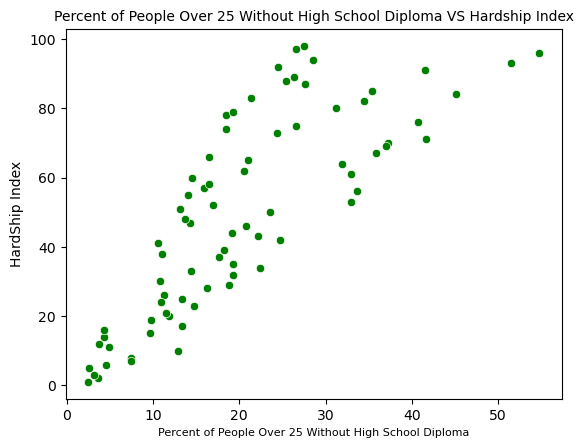

In [778]:
sb.scatterplot(x='PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA', y='HARDSHIP_INDEX', data=chicago_census_data, color='green')
plt.title('Percent of People Over 25 Without High School Diploma VS Hardship Index', size=10)
plt.xlabel('Percent of People Over 25 Without High School Diploma', size=8)
plt.ylabel('HardShip Index', size=10)
plt.show()

#### From the scatter plot, we can clearly observe that as the percentage of people over 25 without a high school diploma increases, the hardship index also rises. This indicates a positive correlation between these two variables.

In [755]:
# Finding the correlation between the two variables.
corr = chicago_census_data['PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA'].corr(chicago_census_data['HARDSHIP_INDEX'])
corr

0.8025383898135141

#### `The correlation between Percent of People Over 25 Without High School Diploma and Hardship Index is "0.80". This strong positive correlation means that as one variable increases, the other is also likely to increase, as demonstrated in the scatter plot.`

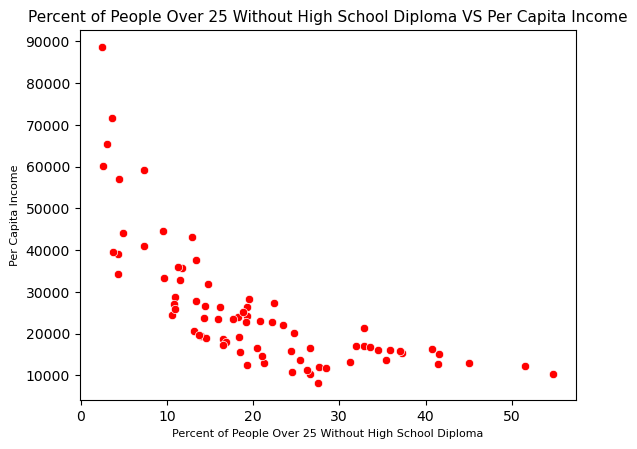

In [776]:
sb.scatterplot(x='PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA', y='PER_CAPITA_INCOME', data=chicago_census_data, color='red')
plt.title('Percent of People Over 25 Without High School Diploma VS Per Capita Income', size=11)
plt.xlabel('Percent of People Over 25 Without High School Diploma', size=8)
plt.ylabel('Per Capita Income', size=8)
plt.show()

#### From the scatter plot, we can clearly observe that as the percentage of people over 25 without a high school diploma increases, the per capita income decreases. This indicates a negative correlation between the two variables.

In [769]:
corr2 = chicago_census_data['PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA'].corr(chicago_census_data['PER_CAPITA_INCOME'])
corr2

-0.7097704172348066

#### `The correlation between Percent of People Over 25 Without High School Diploma and Per Capita Income is "-0.71". This negative correlation means that as one variable increases, the other is likely to decrease.`

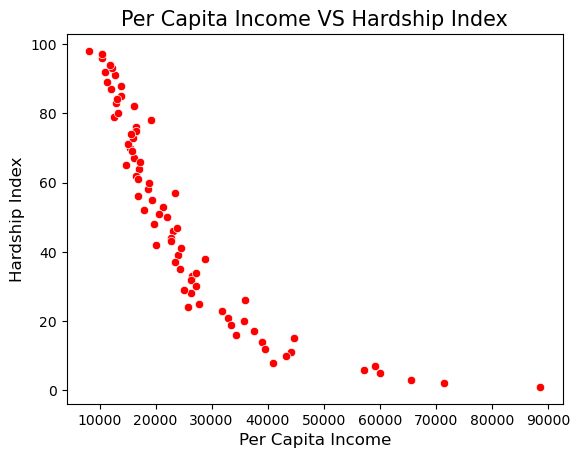

In [534]:
sb.scatterplot(x='PER_CAPITA_INCOME', y='HARDSHIP_INDEX', data=chicago_census_data, color='red')
plt.title('Per Capita Income VS Hardship Index', size=15)
plt.xlabel('Per Capita Income', size=12)
plt.ylabel('Hardship Index', size=12)
plt.show()

#### From the scatter plot, it is clear that as Per Capita Income increases, the Hardship Index decreases significantly. This indicates a strong negative correlation between the two variables.

In [784]:
corr3 = chicago_census_data['PER_CAPITA_INCOME'].corr(chicago_census_data['HARDSHIP_INDEX'])
corr3

-0.8491674629307862

#### `The correlation between Per Capita Income and Hardship Index is "-0.85". This strong negative correlation indicates that as Per Capita Income increases, the Hardship Index consistently decreases.`

## **Conclusion from the Census Data:**
#### The data shows a strong dependence of the Hardship Index on Per Capita Income. Areas with higher per capita income tend to have lower Hardship Index values, suggesting that when people can afford necessities and some luxuries, their hardships are reduced. Conversely, areas with lower per capita income experience higher hardship due to a lack of resources. Additionally, a higher percentage of people over 25 without a high school diploma correlates with lower per capita income. This indicates that education is a key factor in income levels, and the lack of higher education contributes to increased hardship.

# **`Final Conclusion :`**
## 1. `The analysis reveals that higher per capita income is strongly associated with a lower Hardship Index, suggesting that greater financial resources reduce hardship. Additionally, a higher percentage of individuals without a high school diploma correlates with lower income levels, emphasizing the importance of education in mitigating hardship.`
## 2. `The analysis reveals that most crimes occur on streets, followed by residences, sidewalks, and apartments, with theft being the most common crime across all locations, followed by battery, criminal damage, and narcotics.`
## 3. `We found that all three types of schools—elementary, middle, and high schools—are nearly equal in safety standards, with middle schools being very slightly less safe than the other two.`

# **`Suggestions :`**
## 1. **`To Reduce Hardship:`**
### - **`Improve access to education:`** `Invest in programs that help individuals obtain high school diplomas and higher education. Building more high schools, raising awareness about the importance of education, and offering low-cost or free higher education can greatly improve income levels.  This could help raise income levels and reduce hardship in areas with lower educational attainment.`
### - **`Increase economic opportunities:`** `Targeted policies to increase income in low-income areas, such as job training programs and local economic development initiatives, could help reduce the Hardship Index.`
### - **`Attract Foreign Investment:`** `Encouraging foreign companies to set up branches locally will create more job opportunities, increasing income and improving living standards.`


## 2. **`To Reduce Crime:`**
### - **`Increase policing and security in high-crime areas:`** `Focus on streets and residences, where most crimes occur, by improving law enforcement presence and surveillance.`
### - **`Community engagement programs:`** `Promote community watch programs and neighborhood safety initiatives to help prevent crimes like theft and criminal damage.`
### - **`Crime prevention education:`** `Launch educational campaigns to reduce crimes such as narcotics abuse and battery by addressing underlying causes like substance addiction and violence.`


## 3. **`To Improve School Safety:`**
### - **`Targeted safety improvements for middle schools:`** `Since middle schools are slightly less safe, focus on enhancing safety measures such as increased security personnel, better infrastructure, and safety drills.`
### - **`Safety training and awareness programs:`** `Provide regular safety training for students and staff at all school levels to reinforce safety practices and encourage vigilance.`